In [73]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.interpolate import CubicSpline

In [76]:
original_waypoints = np.loadtxt('race3_rl_4.csv', delimiter=',')
lobby_map = cv2.imread('../map/race3_2.pgm', cv2.IMREAD_GRAYSCALE)
seg_waypoints = np.loadtxt('./race3_seg_tune.csv', delimiter=',')
resolution = 0.05
origin = [-10.3, -1.55]

In [77]:
s = seg_waypoints[:, -1]
v = seg_waypoints[:, 2]

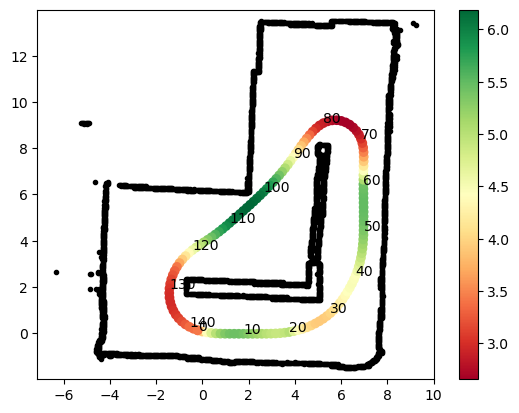

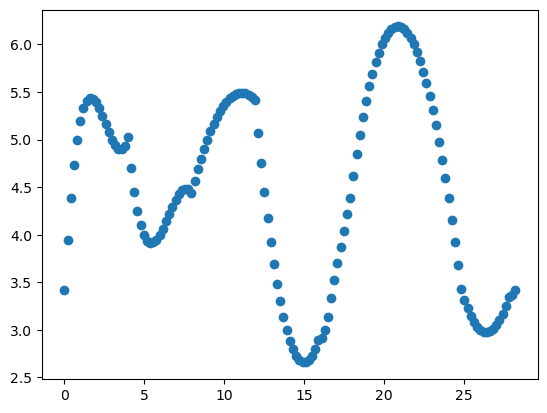

In [78]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')


velocities = seg_waypoints[:,2]
# gloabl_v_min = velocities.min()
# global_v_max = velocities.max()

# set_v_min = 2.0
# set_v_max = 5.0

# velocities = (velocities - gloabl_v_min) / (global_v_max - gloabl_v_min) * (set_v_max - set_v_min) + set_v_min

plt.scatter(seg_waypoints[:,0], seg_waypoints[:,1], c=velocities, cmap='RdYlGn')
for i in range(len(seg_waypoints)):
    if i % 10 == 0:
        plt.text(seg_waypoints[i, 0], seg_waypoints[i, 1], str(i), font='bold')
plt.colorbar()
plt.axis('equal')
plt.show()
plt.plot(s, v, 'o', label='data')

In [124]:
start_idx = 60
# startvalue = 
end_idx = 90

keypoints = [79]
vels = [3.5]
max_clip = 3.5

s_spline = [seg_waypoints[start_idx, -1]]
v_spline = [seg_waypoints[start_idx, 2]]
for i, v in zip(keypoints, vels):
    s_spline.append(seg_waypoints[i, -1])
    v_spline.append(v)
s_spline.append(seg_waypoints[end_idx, -1])
v_spline.append(seg_waypoints[end_idx, 2])

print(v_spline)

s_resampled = seg_waypoints[start_idx:end_idx+1, -1]
v_spline = CubicSpline(s_spline, v_spline)

v_resampled = v_spline(s_resampled)
# if max_clip is not None:
#     v_resampled = np.clip(v_resampled, 0, max_clip)
new_waypoints = np.copy(seg_waypoints)
new_waypoints[start_idx:end_idx+1, 2] = v_resampled

print(v_resampled)

[5.418, 3.5, 4.382]
[3.5        3.5        3.5        3.5        3.5        3.5
 3.5        3.5        3.5        3.5        3.5        3.5
 3.5        3.5        3.5        3.5        3.5        3.49660798
 3.49224596 3.5        3.5        3.5        3.5        3.5
 3.5        3.5        3.5        3.5        3.5        3.5
 3.5       ]


In [117]:
seg_waypoints[0, 2] = 4.05

In [122]:
seg_waypoints = new_waypoints.copy()

(-7.130000448226928, 10.030001020431518, -2.25, 14.25)

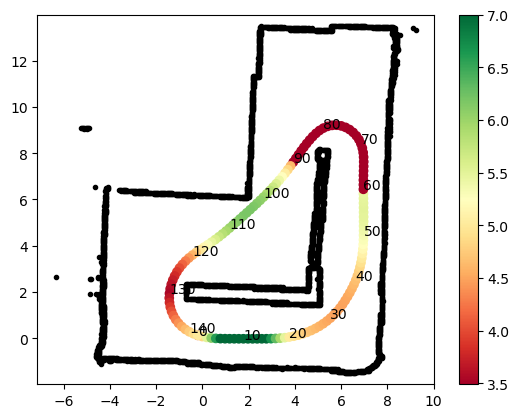

In [125]:
blackpts = np.argwhere(lobby_map <= 40).astype(np.float32)
blackpts[:, 0] = (lobby_map.shape[0] - blackpts[:, 0]) * resolution + origin[1]
blackpts[:, 1] = blackpts[:, 1] * resolution + origin[0]
colors = ['ro', 'bo', 'go', 'yo']
plt.plot(blackpts[:,1], blackpts[:,0], 'k.')


velocities = new_waypoints[:,2]
# gloabl_v_min = velocities.min()
# global_v_max = velocities.max()

# set_v_min = 2.0
# set_v_max = 5.0

# velocities = (velocities - gloabl_v_min) / (global_v_max - gloabl_v_min) * (set_v_max - set_v_min) + set_v_min

plt.scatter(new_waypoints[:,0], new_waypoints[:,1], c=velocities, cmap='RdYlGn')
for i in range(len(new_waypoints)):
    if i % 10 == 0:
        plt.text(new_waypoints[i, 0], new_waypoints[i, 1], str(i), font='bold')
plt.colorbar()
plt.axis('equal')

In [123]:
np.savetxt('race3_seg_tune.csv', seg_waypoints, delimiter=',')